In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch 
from torch import nn
from sklearn.datasets import make_moons

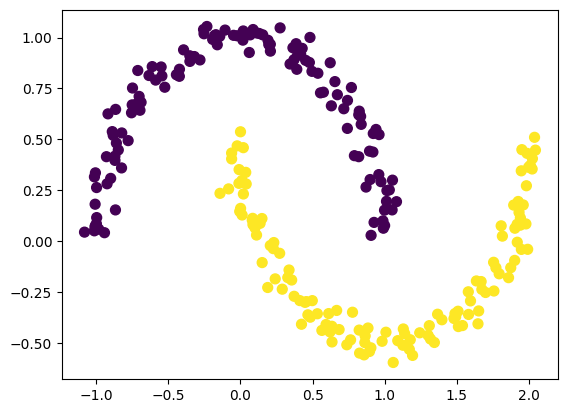

In [20]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, s=50)
plt.show()

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
class vanish_moons(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=10),  # linear layer
            nn.ReLU(),                # Sigmoid activation
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=10),
            nn.ReLU(), 
            nn.Linear(in_features=10, out_features=1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
model = vanish_moons().to(device)

In [23]:
model

vanish_moons(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): ReLU()
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): ReLU()
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): ReLU()
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): ReLU()
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): ReLU()
    (16): Linear(in_features=10, out_features=10, bias=True)
    (17): ReLU()
    (18): Linear(in_features=10, out_features=1, bias=True)
    (19): Sigmoid()
  )
)

In [24]:
model.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5103, -0.5232],
                      [-0.5257, -0.4869],
                      [ 0.3499, -0.6657],
                      [ 0.3024, -0.6556],
                      [-0.3121, -0.0196],
                      [-0.0513,  0.3317],
                      [ 0.1910,  0.2649],
                      [-0.5368, -0.1055],
                      [ 0.4492,  0.3841],
                      [-0.4493, -0.2139]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.6201, -0.6340,  0.4755, -0.4877, -0.6281, -0.2500, -0.0430,  0.0123,
                       0.5644, -0.0832])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.1118,  0.0038,  0.1763,  0.2570,  0.0475,  0.2995, -0.1074, -0.1217,
                        0.0262,  0.2650],
                      [-0.2667, -0.0202,  0.2044, -0.2594,  0.0412,  0.0003, -0.2659,  0.2561,
                        0.3094,  0.1342],
                      [ 0.2996, -

In [25]:
# loss_fc and optimizer
loss_fc = nn.BCELoss() 

optimizer = torch.optim.Adam(params = model.parameters(),
                            lr = 0.001)

In [26]:
old_weights = model.linear_layer_stack[0].weight.clone()
old_weights

tensor([[ 0.5103, -0.5232],
        [-0.5257, -0.4869],
        [ 0.3499, -0.6657],
        [ 0.3024, -0.6556],
        [-0.3121, -0.0196],
        [-0.0513,  0.3317],
        [ 0.1910,  0.2649],
        [-0.5368, -0.1055],
        [ 0.4492,  0.3841],
        [-0.4493, -0.2139]], grad_fn=<CloneBackward0>)

In [27]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
epochs = 100

for epoch in range(epochs):

  model.train()

  # forward pass
  y_logits = model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate the loss/accuarcy
  loss = loss_fc(y_logits, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

  # backpropagation
  loss.backward()

  # optimizer step (perform gradient descent)
  optimizer.step()

  # testing
  model.eval()
  with torch.inference_mode():

    # forward pass
    test_logits = model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss/accuarcy
    test_loss = loss_fc(test_logits, y_test)


# lets print out what is happening
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.693894624710083
Epoch: 1 | Loss: 0.6938287615776062
Epoch: 2 | Loss: 0.6937655806541443
Epoch: 3 | Loss: 0.6937052011489868
Epoch: 4 | Loss: 0.6936476230621338
Epoch: 5 | Loss: 0.6935926675796509
Epoch: 6 | Loss: 0.693540632724762
Epoch: 7 | Loss: 0.6934910416603088
Epoch: 8 | Loss: 0.6934441328048706
Epoch: 9 | Loss: 0.6933997273445129
Epoch: 10 | Loss: 0.6933577656745911
Epoch: 11 | Loss: 0.693318247795105
Epoch: 12 | Loss: 0.6932811141014099
Epoch: 13 | Loss: 0.6932463049888611
Epoch: 14 | Loss: 0.6932138204574585
Epoch: 15 | Loss: 0.693183422088623
Epoch: 16 | Loss: 0.6931552886962891
Epoch: 17 | Loss: 0.693129301071167
Epoch: 18 | Loss: 0.693105161190033
Epoch: 19 | Loss: 0.6930831074714661
Epoch: 20 | Loss: 0.6930629014968872
Epoch: 21 | Loss: 0.6930444836616516
Epoch: 22 | Loss: 0.6930277347564697
Epoch: 23 | Loss: 0.6930127143859863
Epoch: 24 | Loss: 0.6929991245269775
Epoch: 25 | Loss: 0.6929869055747986
Epoch: 26 | Loss: 0.6929760575294495
Epoch: 27 | Loss:

In [30]:
model.linear_layer_stack[0].weight

Parameter containing:
tensor([[ 0.3879, -0.4218],
        [-0.5257, -0.4869],
        [ 0.4398, -0.8215],
        [ 0.2109, -0.5596],
        [-0.3121, -0.0196],
        [-0.0112,  0.2703],
        [ 0.1828,  0.4214],
        [-0.5817, -0.0814],
        [ 0.5830,  0.2319],
        [-0.4956, -0.1513]], requires_grad=True)

In [31]:
new_weight = model.linear_layer_stack[0].weight
new_weight

Parameter containing:
tensor([[ 0.3879, -0.4218],
        [-0.5257, -0.4869],
        [ 0.4398, -0.8215],
        [ 0.2109, -0.5596],
        [-0.3121, -0.0196],
        [-0.0112,  0.2703],
        [ 0.1828,  0.4214],
        [-0.5817, -0.0814],
        [ 0.5830,  0.2319],
        [-0.4956, -0.1513]], requires_grad=True)

In [32]:
lr = optimizer.param_groups[0]['lr']
lr

0.001

In [33]:
gradient = (old_weights - new_weight) / lr
percent_change = abs(100*(old_weights - new_weight) / old_weights)

In [34]:
gradient

tensor([[ 122.4074, -101.3511],
        [   0.0000,    0.0000],
        [ -89.9319,  155.7254],
        [  91.5769,  -95.9532],
        [   0.0000,    0.0000],
        [ -40.1931,   61.4551],
        [   8.1994, -156.5013],
        [  44.9089,  -24.1370],
        [-133.8007,  152.2740],
        [  46.2882,  -62.5626]], grad_fn=<DivBackward0>)

In [35]:
percent_change

tensor([[23.9870, 19.3729],
        [ 0.0000,  0.0000],
        [25.7034, 23.3913],
        [30.2786, 14.6361],
        [ 0.0000,  0.0000],
        [78.2769, 18.5266],
        [ 4.2919, 59.0853],
        [ 8.3664, 22.8688],
        [29.7882, 39.6418],
        [10.3027, 29.2508]], grad_fn=<AbsBackward0>)

# ReLu is working